In [4]:
from data import *

In [3]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGenerator = trainGenerator(20,'/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TrainingSet/LungInfection-Train/Doctor-label','Imgs','GT',data_gen_args,save_to_dir = "/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TrainingSet/LungInfection-Train/Doctor-label/aug")

In [4]:
num_batch = 3
for i,batch in enumerate(myGenerator):
    if(i >= num_batch):
        break

Found 50 images belonging to 1 classes.
Found 50 images belonging to 1 classes.


In [5]:
image_arr,mask_arr = geneTrainNpy("/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TrainingSet/LungInfection-Train/Doctor-label/aug","/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TrainingSet/LungInfection-Train/Doctor-label/aug")

In [5]:
from model import *

In [3]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TrainingSet/LungInfection-Train/Doctor-label','Imgs','GT',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=50,epochs=100,callbacks=[model_checkpoint])

/content/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/100
Found 50 images belonging to 1 classes.
Found 50 images belonging to 1 classes.
50/50 [==============================] - 28s 562ms/step - loss: 0.4337 - accuracy: 0.8589

Epoch 00001: loss improved from inf to 0.43372, saving model to unet_membrane.hdf5
Epoch 2/100
50/50 [==============================] - 20s 405ms/step - loss: 0.4407 - accuracy: 0.8579

Epoch 00002: loss did not improve from 0.43372
Epoch 3/100
50/50 [==============================] - 20s 406ms/step - loss: 0.4110 - accuracy: 0.8582

Epoch 00003: loss improved from 0.43372 to 0.41095, saving model to unet_membrane.hdf5
Epoch 4/100
50/50 [==============================] - 20s 405ms/step - loss: 0.3676 - accuracy: 0.8593

Epoch 00004: loss improved from 0.41095 to 0.36756, saving model to unet_membrane.hdf5
Epoch 5/100
50/50 [==============================] - 20s 406ms/step - loss: 0.3470 - accuracy: 0.8582

Epoch 00005: loss improved from 0.36756 to 0.34701, saving model to unet_membrane.hdf5
Epoch 6/100
50

In [12]:
testGene = testGenerator("/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-Test/Imgs")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,48,verbose=1)
saveResult("/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-Test",results)

/content/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


48/48 [==============================] - 4s 87ms/step


In [22]:
true = testGenerator("/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-Test/GT")

In [3]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TrainingSet/LungInfection-Train/Doctor-label','Imgs','GT',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_lung.hdf5', monitor='loss',verbose=1, save_best_only=True)
H=model.fit_generator(myGene,steps_per_epoch=50,epochs=100,callbacks=[model_checkpoint])

/content/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/100
Found 50 images belonging to 1 classes.
Found 50 images belonging to 1 classes.
50/50 [==============================] - 28s 556ms/step - loss: 0.7013 - accuracy: 0.8526

Epoch 00001: loss improved from inf to 0.70133, saving model to unet_lung.hdf5
Epoch 2/100
50/50 [==============================] - 20s 401ms/step - loss: 0.6906 - accuracy: 0.8579

Epoch 00002: loss improved from 0.70133 to 0.69055, saving model to unet_lung.hdf5
Epoch 3/100
50/50 [==============================] - 20s 402ms/step - loss: 0.6878 - accuracy: 0.8582

Epoch 00003: loss improved from 0.69055 to 0.68778, saving model to unet_lung.hdf5
Epoch 4/100
50/50 [==============================] - 20s 405ms/step - loss: 0.4783 - accuracy: 0.8593

Epoch 00004: loss improved from 0.68778 to 0.47827, saving model to unet_lung.hdf5
Epoch 5/100
50/50 [==============================] - 20s 406ms/step - loss: 0.4008 - accuracy: 0.8582

Epoch 00005: loss improved from 0.47827 to 0.40078, saving model to unet_lung

In [6]:
testGene = testGenerator("/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-Test/Imgs")
model = unet()
model.load_weights("unet_lung.hdf5")
results = model.predict_generator(testGene,48,verbose=1)
saveResult("/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-Test",results)

/content/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


48/48 [==============================] - 5s 108ms/step


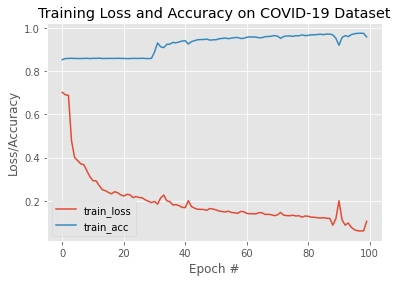

In [8]:
import matplotlib.pyplot as plt
N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")

plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()